This file compare the data by plotting graphes

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

directory = 'Colab Notebooks/FYP/data/'  # Change this to your path
import os
import numpy as np
unzipped_directory2 = '/content/drive/MyDrive/Colab Notebooks/FYP/data/alotofzipped/hairpin-traces-main'

Mounted at /content/drive


In [ ]:
# Load the .npy file
loaded_data = np.load('/content/drive/MyDrive/Colab Notebooks/FYP/data/extracted_data.npy', allow_pickle=True)


In [ ]:
# Load the uploaded .npy file
#2: 100 epoch 30 length
#3: 100 epoch 300 length
#4: 400 epoch 3000 length
#5: 100 epoch 3000 length
#6: 400 epoch 300 length
#7: 100 e 3000 len 300 batch
#8: 100 e 3000 len 6000 batch 5e-3 lr

file_path = '/content/synthetic_features_5.npy'  # Update the path if necessary
data = np.load(file_path)


In [ ]:
#Explainable Comparison 0

#Using wasserstein_distances that paper have used, Paper: compare with other model
#Can also use R^2 score (paper have also used to compare other model)

from scipy.stats import wasserstein_distance

# Initialize a list to store Wasserstein distances for each feature
wasserstein_distances = []

# Iterate over each feature (assuming 3 features)
for feature_idx in range(data.shape[2]):
    # Extract the feature across all samples for both datasets
    g1 = data[:, :, feature_idx].flatten()
    m1 = loaded_data[:, :, feature_idx].flatten()

    # Calculate the Wasserstein-1 distance for the current feature
    distance = wasserstein_distance(g1, m1)
    wasserstein_distances.append(distance)

# Print the Wasserstein-1 distances for all features
for idx, dist in enumerate(wasserstein_distances):
    print(f"Wasserstein-1 Distance (Feature {idx}): {dist}")

Wasserstein-1 Distance (Feature 0): 23.007224139261684
Wasserstein-1 Distance (Feature 1): 10.620172209522101
Wasserstein-1 Distance (Feature 2): 0.7494883705668991


3
Visualizing the best sample 4 with index: 3


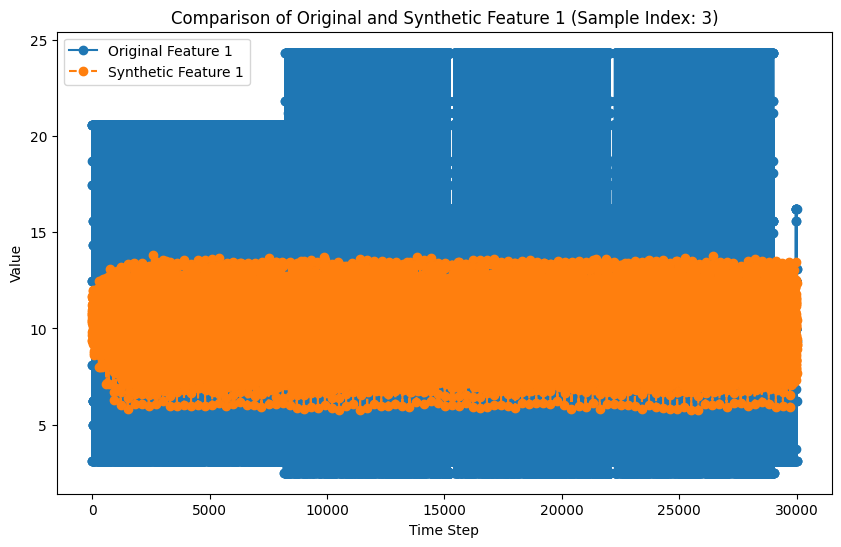

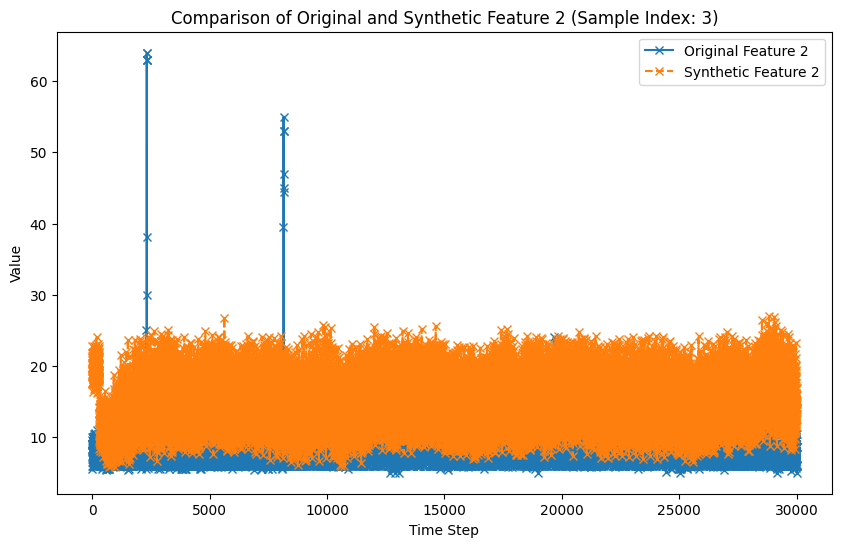

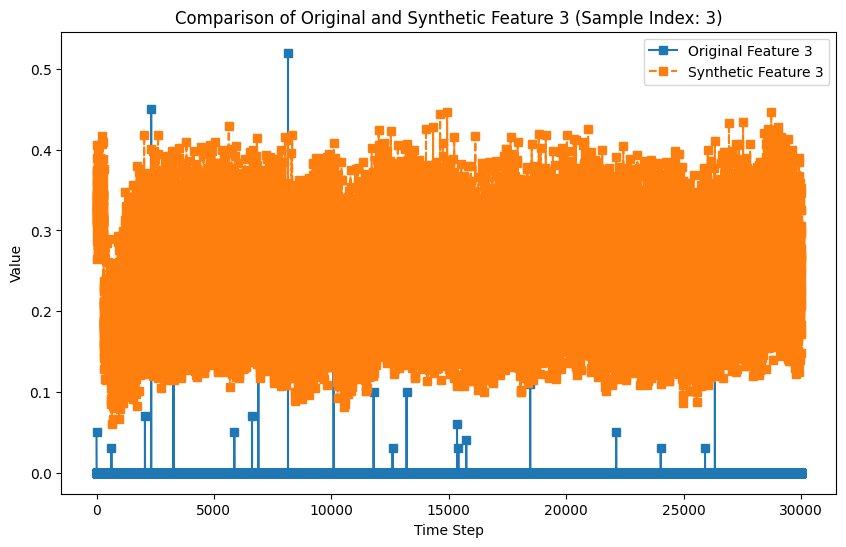

In [ ]:
## Find a similar and good comparison
##
features=loaded_data
synthetic_features=data
# Find n best samples by comparing the sum of absolute differences between original and synthetic features
n = 9999  # Number of best samples to find
differences = [np.sum(np.abs(features[i] - synthetic_features[i])) for i in range(len(synthetic_features))]
best_samples = np.argsort(differences)[:n]

# Visualize the original and synthetic features for the best samples
import matplotlib.pyplot as plt

#for idx, sample_index in enumerate(best_samples):
x=3       ###########
y=best_samples[x]
print(y)

print(f"Visualizing the best sample {x + 1} with index: {y}")
original_feature = features[y]
synthetic_feature = synthetic_features[y]

# Plot Feature 1
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 0], label='Original Feature 1', marker='o')
plt.plot(synthetic_feature[:, 0], label='Synthetic Feature 1', linestyle='--', marker='o')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 1 (Sample Index: {y})')
plt.legend()
plt.show()

# Plot Feature 2
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 1], label='Original Feature 2', marker='x')
plt.plot(synthetic_feature[:, 1], label='Synthetic Feature 2', linestyle='--', marker='x')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 2 (Sample Index: {y})')
plt.legend()
plt.show()
# Plot Feature 3
plt.figure(figsize=(10, 6))
plt.plot(original_feature[:, 2], label='Original Feature 3', marker='s')
plt.plot(synthetic_feature[:, 2], label='Synthetic Feature 3', linestyle='--', marker='s')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Comparison of Original and Synthetic Feature 3 (Sample Index: {y})')
plt.legend()
plt.show()

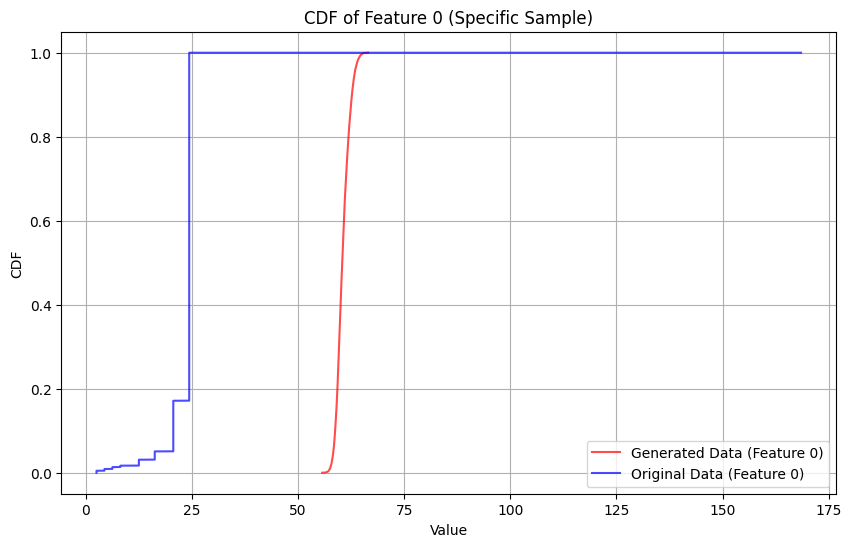

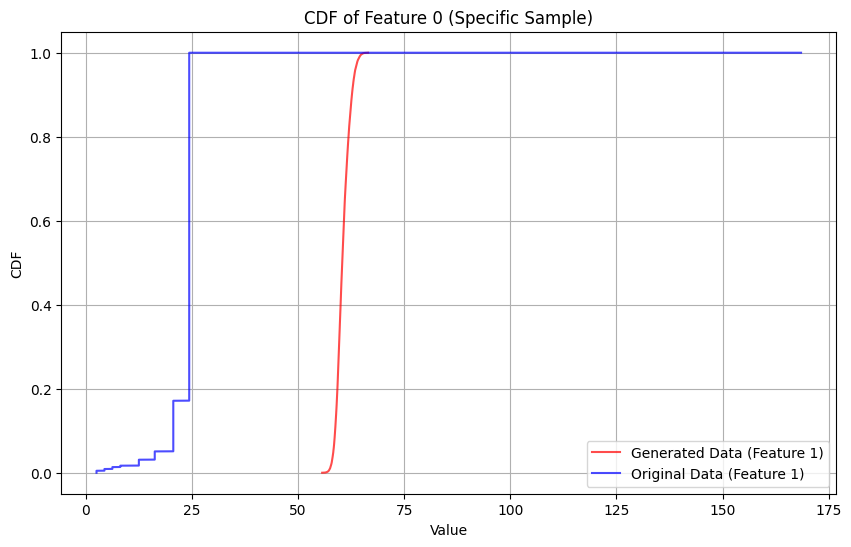

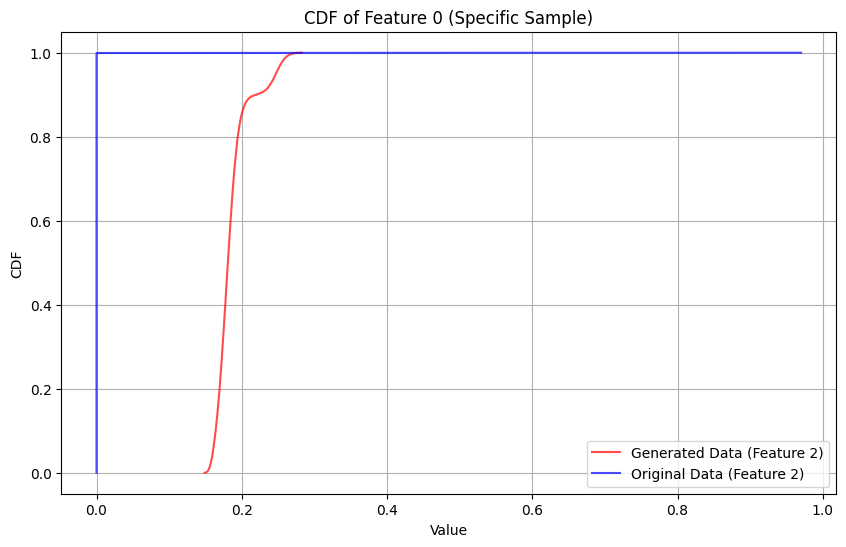

In [ ]:
#CDF

# Visualize the generated data
import matplotlib.pyplot as plt

generally_best_index=372
most_similar_index=307
# Extract feature 0 from a specific sample in both datasets
generated_feature_0 = data[generally_best_index, :, 0]
original_feature_0 = loaded_data[most_similar_index, :, 0]

# Sort the data for CDF calculation
generated_feature_0_sorted = np.sort(generated_feature_0)
original_feature_0_sorted = np.sort(original_feature_0)

# Calculate the CDF values
generated_cdf = np.arange(1, len(generated_feature_0_sorted) + 1) / len(generated_feature_0_sorted)
original_cdf = np.arange(1, len(original_feature_0_sorted) + 1) / len(original_feature_0_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(generated_feature_0_sorted, generated_cdf, label='Generated Data (Feature 0)', color='red', alpha=0.7)
plt.plot(original_feature_0_sorted, original_cdf, label='Original Data (Feature 0)', color='blue', alpha=0.7)

plt.title('CDF of Feature 0 (Specific Sample)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

# Extract feature 0 from a specific sample in both datasets
generated_feature_1 = data[generally_best_index, :, 1]
original_feature_1 = loaded_data[most_similar_index, :, 1]

# Sort the data for CDF calculation
generated_feature_1_sorted = np.sort(generated_feature_1)
original_feature_1_sorted = np.sort(original_feature_1)

# Calculate the CDF values
generated_cdf = np.arange(1, len(generated_feature_0_sorted) + 1) / len(generated_feature_1_sorted)
original_cdf = np.arange(1, len(original_feature_0_sorted) + 1) / len(original_feature_1_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(generated_feature_0_sorted, generated_cdf, label='Generated Data (Feature 1)', color='red', alpha=0.7)
plt.plot(original_feature_0_sorted, original_cdf, label='Original Data (Feature 1)', color='blue', alpha=0.7)

plt.title('CDF of Feature 0 (Specific Sample)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

# Extract feature 0 from a specific sample in both datasets
generated_feature_2 = data[generally_best_index, :, 2]
original_feature_2 = loaded_data[most_similar_index, :, 2]

# Sort the data for CDF calculation
generated_feature_2_sorted = np.sort(generated_feature_2)
original_feature_2_sorted = np.sort(original_feature_2)

# Calculate the CDF values
generated_cdf = np.arange(1, len(generated_feature_0_sorted) + 1) / len(generated_feature_2_sorted)
original_cdf = np.arange(1, len(original_feature_0_sorted) + 1) / len(original_feature_2_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(generated_feature_2_sorted, generated_cdf, label='Generated Data (Feature 2)', color='red', alpha=0.7)
plt.plot(original_feature_2_sorted, original_cdf, label='Original Data (Feature 2)', color='blue', alpha=0.7)

plt.title('CDF of Feature 0 (Specific Sample)')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()

Pearson Correlation Coefficient for Feature 0: -0.0018500945908069993


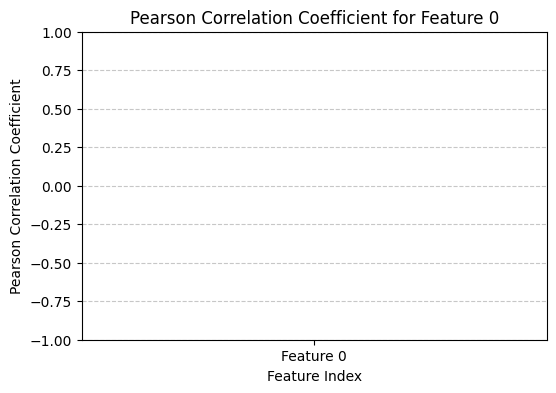

In [ ]:
#NOT work

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Ensure the data is in a numeric format
data_numeric = data.astype(float)
loaded_data_numeric = loaded_data.astype(float)

# Extract feature 0 for both datasets
generated_feature = data_numeric[generally_best_index, :, 0]
original_feature = loaded_data_numeric[most_similar_index, :, 0]

# Calculate the Pearson correlation coefficient for feature 0
correlation, _ = pearsonr(generated_feature, original_feature)

# Print the Pearson correlation coefficient
print(f"Pearson Correlation Coefficient for Feature 0: {correlation}")

# Plot the Pearson correlation coefficient as a bar chart
plt.figure(figsize=(6, 4))
plt.bar([0], [correlation], color='red', alpha=0.7)
plt.title('Pearson Correlation Coefficient for Feature 0')
plt.xlabel('Feature Index')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks([0], ['Feature 0'])
plt.ylim(-1, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


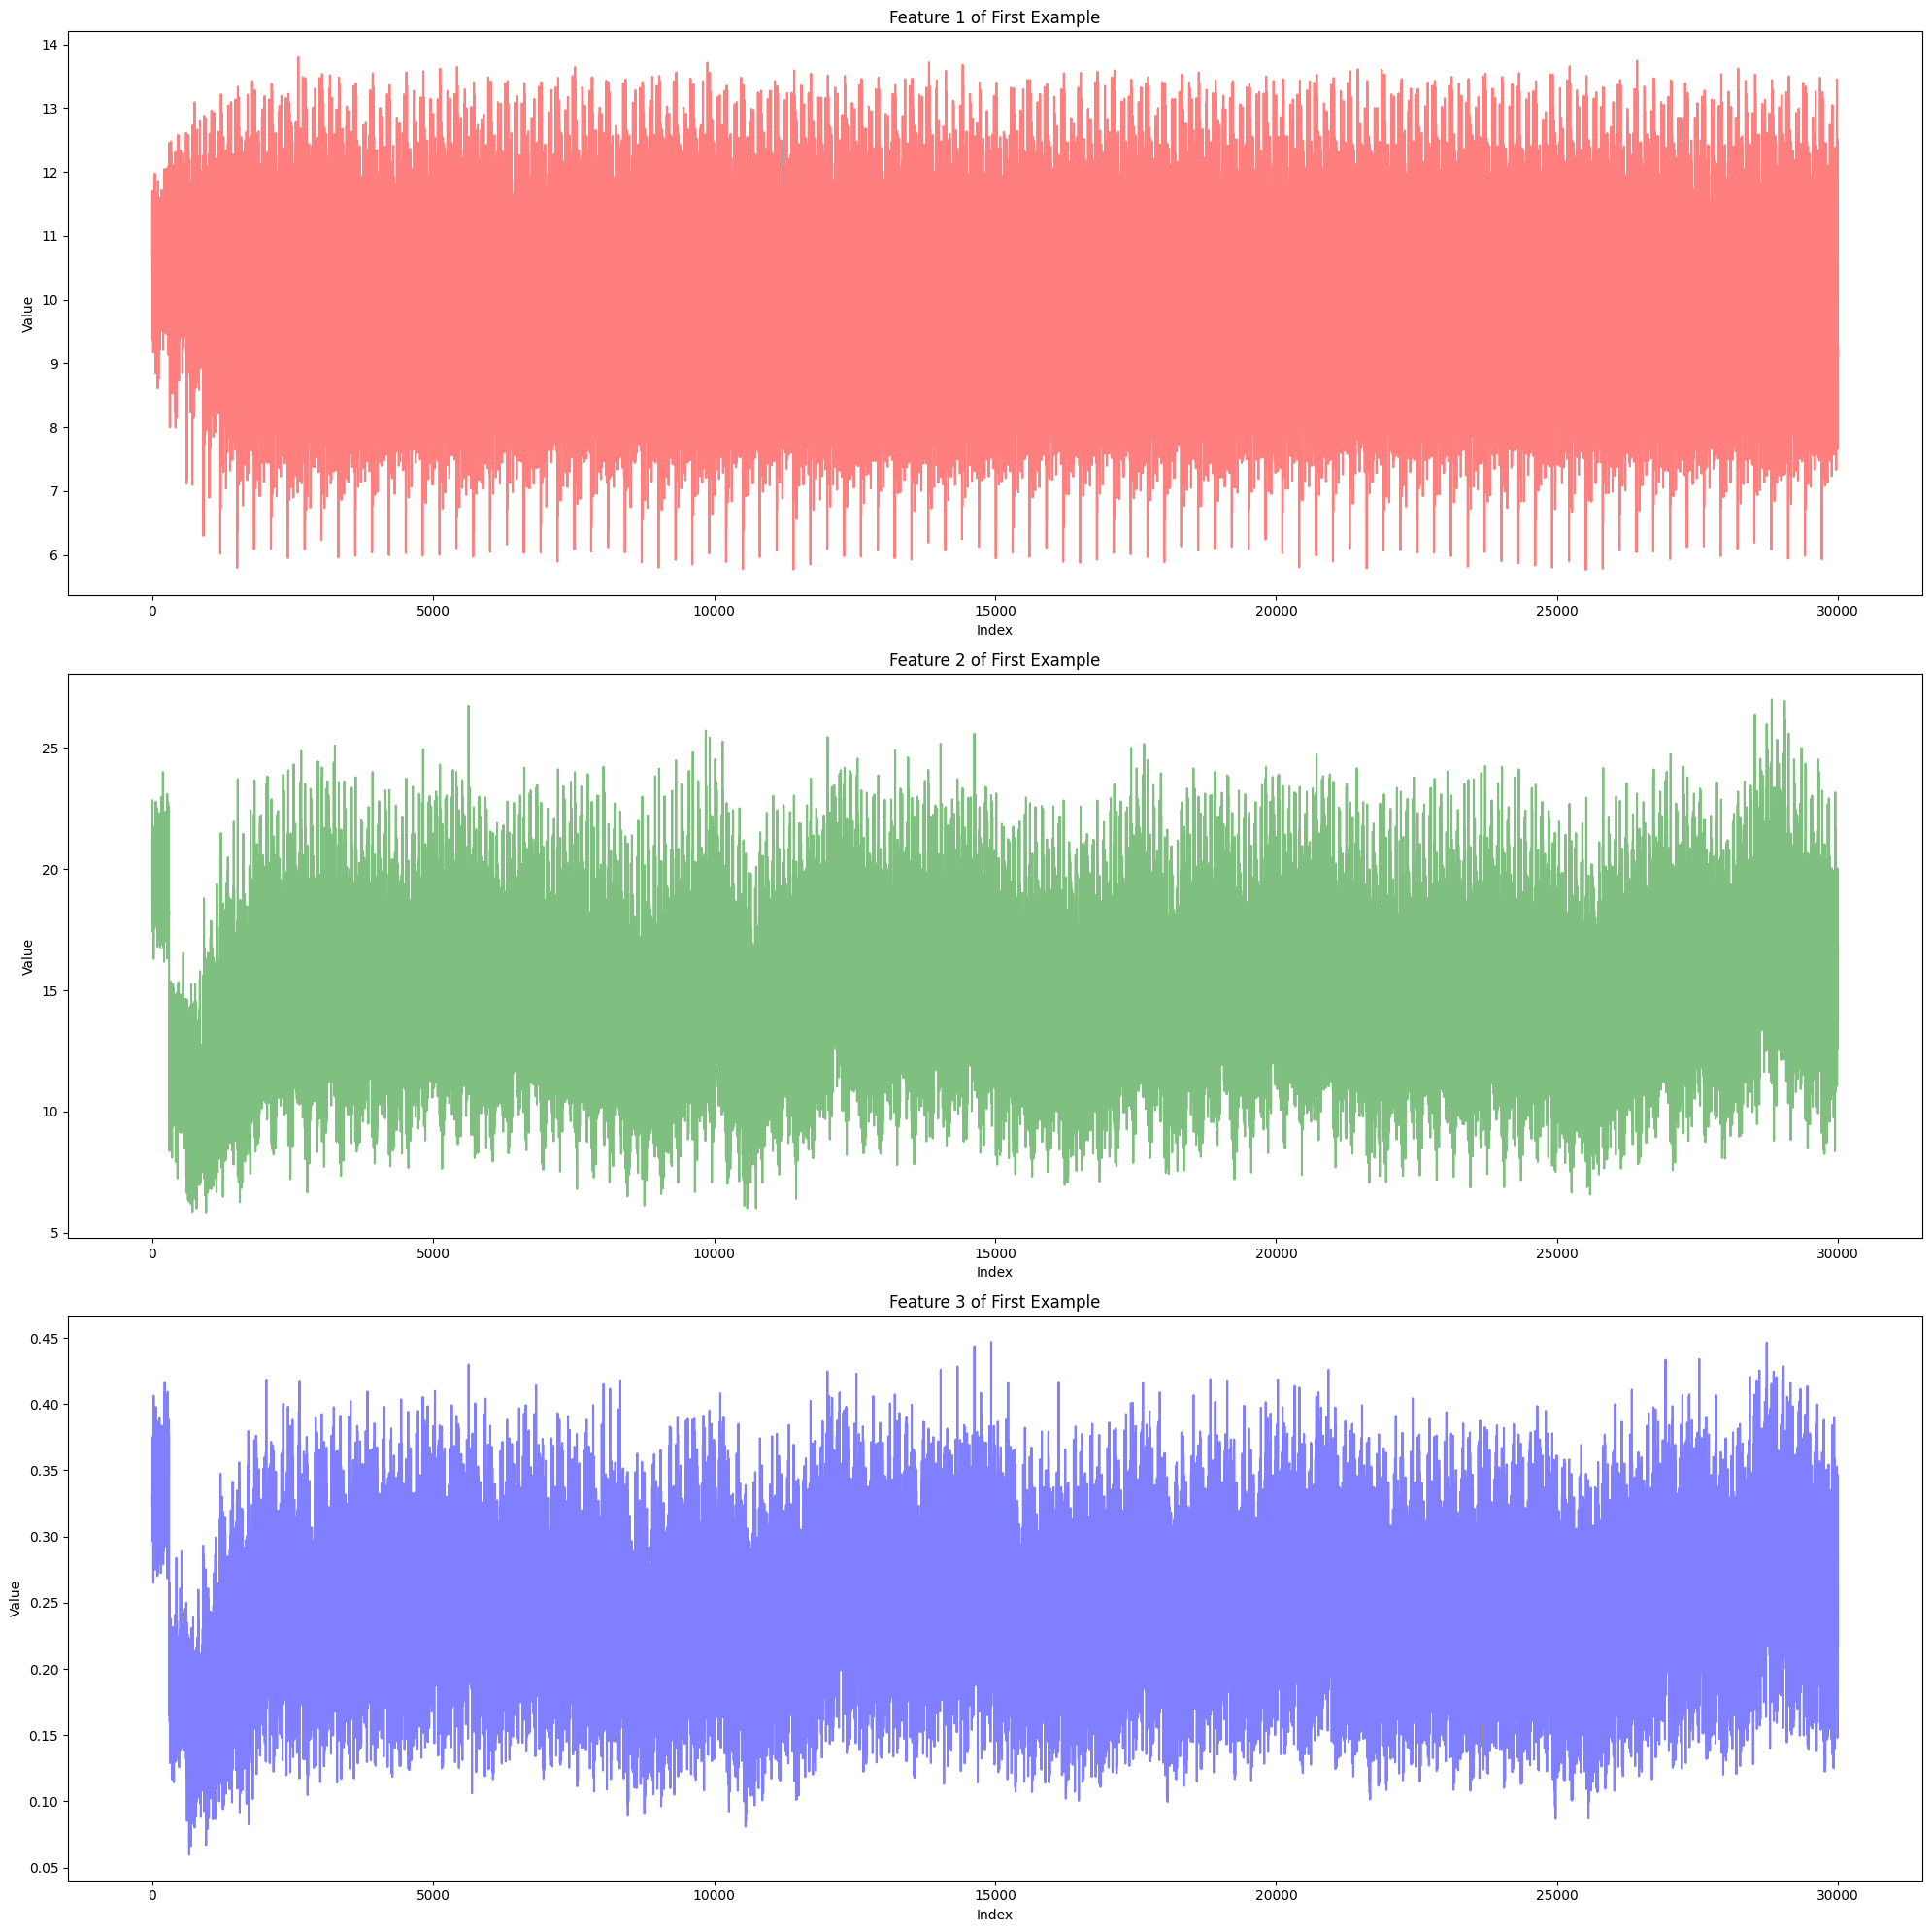

In [ ]:
# Visualize the generated data
import matplotlib.pyplot as plt

# Plot the three features of the first example
plt.figure(figsize=(20, 20))

#####choose the index to see
x=3
# Feature 1
plt.subplot(3, 1, 1)
plt.plot(data[x, :, 0], label='Feature 1', color='r',alpha=0.5)
plt.title('Feature 1 of First Example')
plt.xlabel('Index')
plt.ylabel('Value')

# Feature 2
plt.subplot(3, 1, 2)
plt.plot(data[x, :, 1], label='Feature 2', color='g',alpha=0.5)
plt.title('Feature 2 of First Example')
plt.xlabel('Index')
plt.ylabel('Value')

# Feature 3
plt.subplot(3, 1, 3)
plt.plot(data[x, :, 2], label='Feature 3', color='b',alpha=0.5)
plt.title('Feature 3 of First Example')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

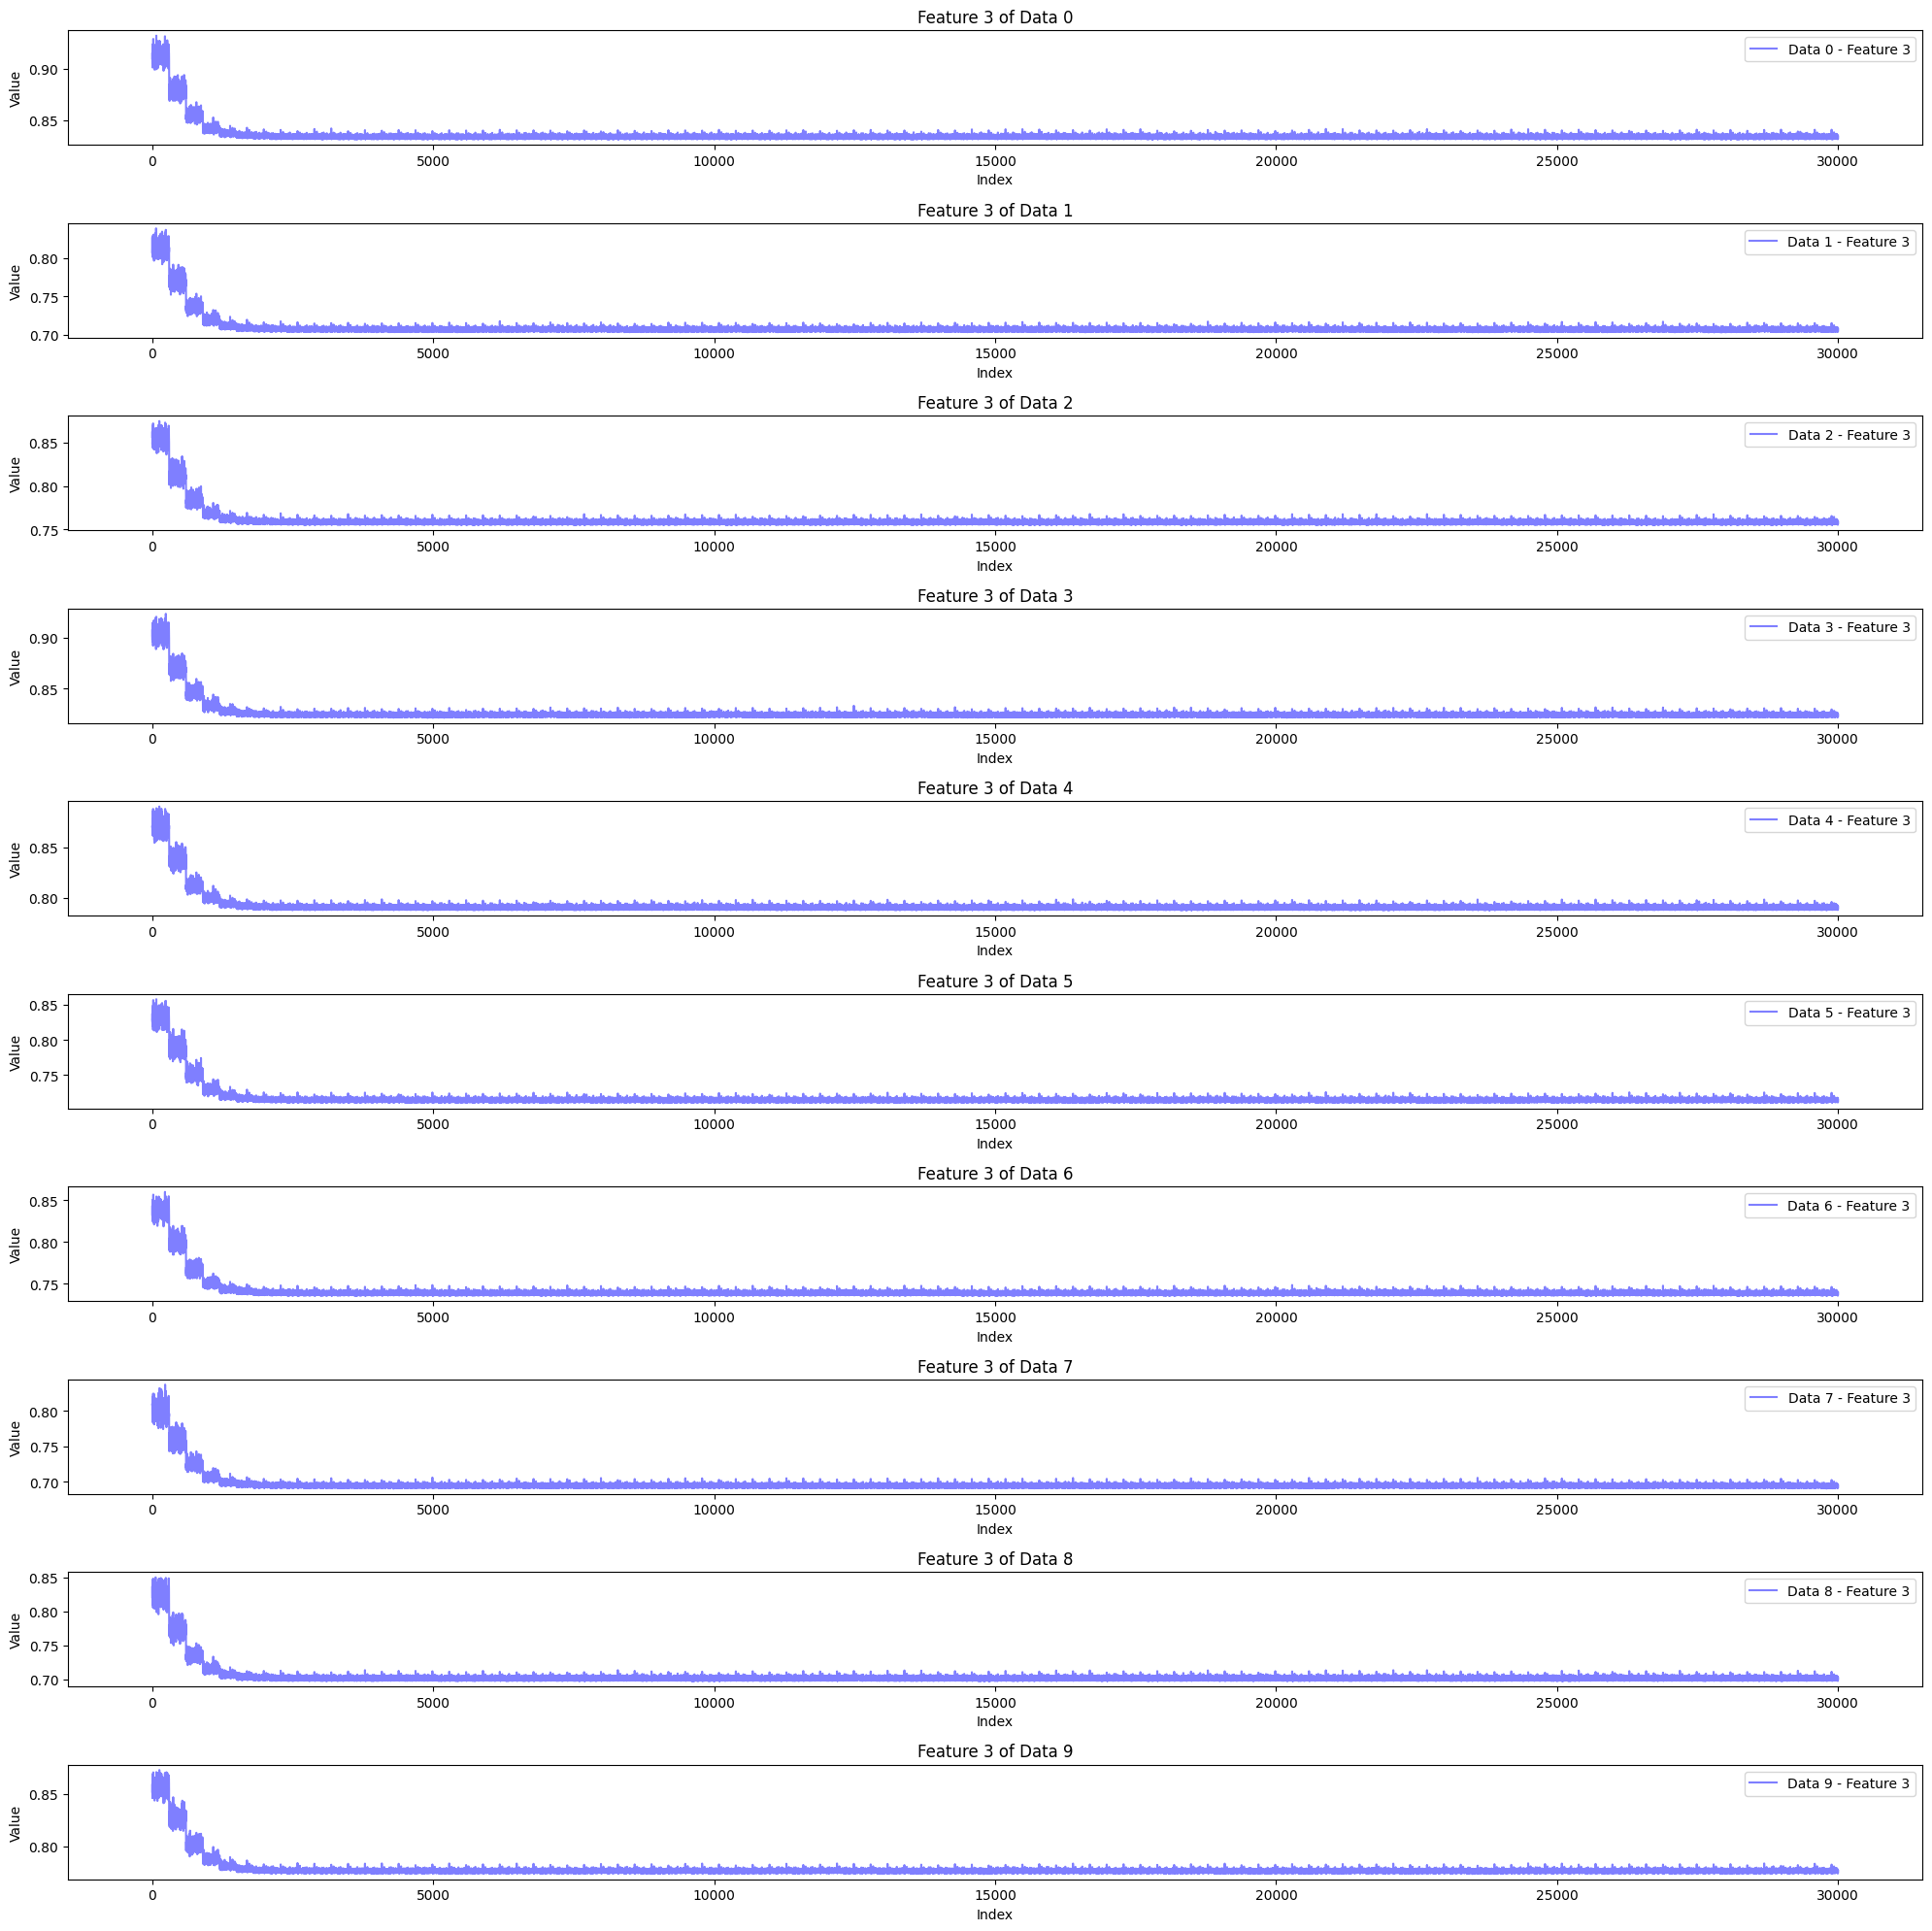

In [ ]:
# To see the general packet loss pattern of the generated data
# Plot Feature 3 for the top 10 data based on best_indices
plt.figure(figsize=(20, 20))

for i in range(10):
    plt.subplot(10, 1, i + 1)
    plt.plot(data[i+200, :, 2], label=f'Data {i} - Feature 3', color='b', alpha=0.5)
    plt.title(f'Feature 3 of Data {i}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

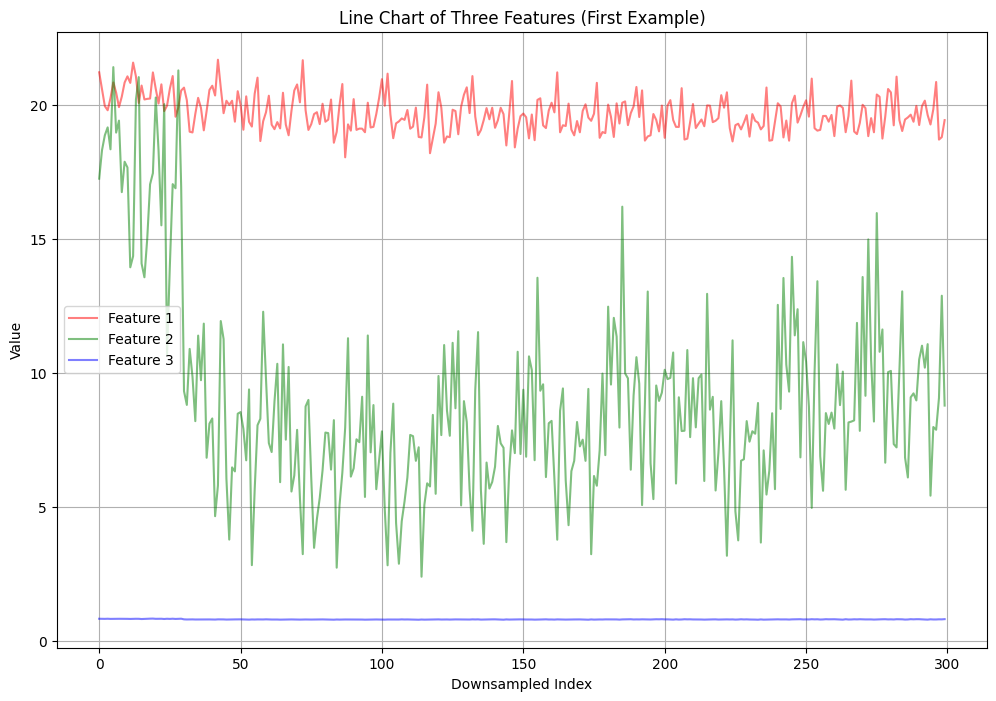

In [ ]:
# Downsample the data for better visualization
downsample_rate = 100  # Plot every 100th point
downsampled_data = data[50, ::downsample_rate, :]

# Line chart for the three features of the first example
plt.figure(figsize=(12, 8))

plt.plot(downsampled_data[:, 0], label='Feature 1', color='r', alpha=0.5)
plt.plot(downsampled_data[:, 1], label='Feature 2', color='g', alpha=0.5)
plt.plot(downsampled_data[:, 2], label='Feature 3', color='b', alpha=0.5)

plt.title('Line Chart of Three Features (First Example)')
plt.xlabel('Downsampled Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Find out some generally representative generated examples (not quite useful)

# loaded_data is a np with shape (1450, 30000, 3)
# data is a generated np with shape (1450, 30000, 3)
# task: Find the generally best data[x] for all loaded_data based on the summerize error between loaded_data and data[x]
# Calculate the summarized error for each data[x] against all loaded_data
best_indices = []
# Summarize the loaded_data by calculating the mean of each feature
summarized_loaded_data = np.mean(loaded_data, axis=1) #(1450,3)
#print(summarized_loaded_data.shape)
for x in range(data.shape[0]):
    reference = np.mean(data[x], axis=0) #(3,)
    #print(reference.shape)
    errors = np.linalg.norm(summarized_loaded_data - reference,ord=1, axis=1)
    total_error = np.sum(errors)
    best_indices.append((x, total_error))

# Find the generally best data[x] with the minimum total error
best_indices.sort(key=lambda item: item[1])
generally_best_index = best_indices[0][0]
generally_best_data = data[generally_best_index]

print(f"Generally Best Data Index: {generally_best_index}")

# Find the top 10 generally best data[x] with the minimum total errors
top_10_best_indices = [item[0] for item in best_indices[:10]]
top_10_best_data = [data[idx] for idx in top_10_best_indices]

print(f"Top 10 Generally Best Data Indices: {top_10_best_indices}")

Generally Best Data Index: 3
Top 10 Generally Best Data Indices: [3, 175, 161, 12, 87, 132, 313, 292, 332, 77]


In [ ]:
#Run time too long--> not useful
mse_errors = []
for x in range(data.shape[0]):
    reference = data[x]
    mse_error = np.mean((loaded_data - reference) ** 2, axis=(1, 2))  # Calculate MSE across all features and indices
    mse_errors.append((x, np.sum(mse_error)))

# Find the generally best data[x] with the minimum MSE error
mse_errors.sort(key=lambda item: item[1])
generally_best_index_mse = mse_errors[0][0]
generally_best_data_mse = data[generally_best_index_mse]

print(f"Generally Best Data Index (MSE): {generally_best_index_mse}")
# Find the top 10 generally best data[x] with the minimum MSE errors
top_10_best_indices_mse = [item[0] for item in mse_errors[:10]]
top_10_best_data_mse = [data[idx] for idx in top_10_best_indices_mse]

print(f"Top 10 Generally Best Data Indices (MSE): {top_10_best_indices_mse}")

KeyboardInterrupt: 

In [ ]:
#Find the most similar of the generated data in original data in a fast method (a few seconds)

generally_best_index=3 #can set generally_best_index

# Find the most similar data in loaded_data to generally_best_data
reference = np.mean(data[generally_best_index], axis=0)
errors = np.linalg.norm(summarized_loaded_data - reference,ord=1,  axis=1)

# Get the index of the most similar data in loaded_data
most_similar_index = np.argmin(errors)
most_similar_data = loaded_data[most_similar_index]

print(f"Most Similar Data Index in loaded_data(training data): {most_similar_index}")


Most Similar Data Index in loaded_data(training data): 1122


In [ ]:
# Find in a slower method (result may diff) (10x few seconds)

# Calculate the error for each data point in loaded_data compared to generally_best_data
pattern_errors = []
for i in range(loaded_data.shape[0]):
    pattern_error = np.mean((loaded_data[i] - data[3]) ** 2)  # MSE for pattern similarity
    pattern_errors.append((i, pattern_error))

# Sort the indices based on pattern similarity errors
pattern_errors.sort(key=lambda item: item[1])

# Get the index of the most similar pattern in loaded_data
most_similar_index = pattern_errors[0][0]
most_similar_data = loaded_data[most_similar_index]

print(f"Most Similar Data Index (Pattern) in loaded_data: {most_similar_index}")

Most Similar Data Index (Pattern) in loaded_data: 904


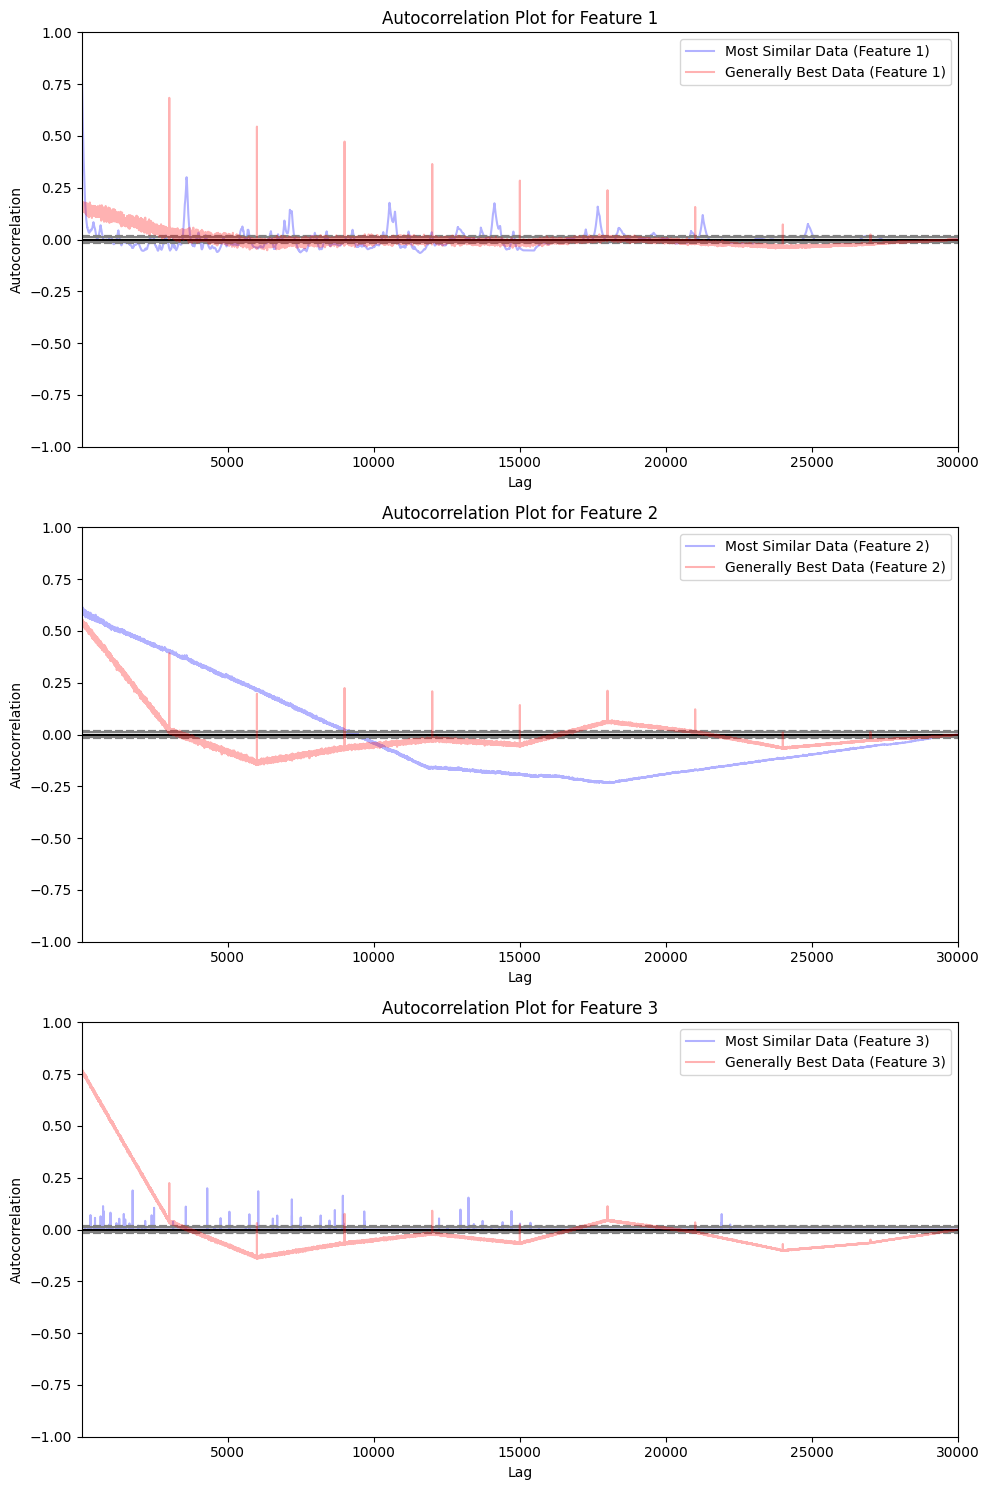

In [ ]:
#Plot autocorrelation

import pandas as pd

generally_best_index=372
most_similar_index=307

from pandas.plotting import autocorrelation_plot
# Extract the data for most_similar_index and generally_best_index
most_similar_data_selected = loaded_data[most_similar_index]
generally_best_data_selected = data[generally_best_index]

# Plot autocorrelation for each feature
plt.figure(figsize=(10, 15))
for feature_idx in range(3):  # Assuming there are 3 features
    plt.subplot(3, 1, feature_idx + 1)
    autocorrelation_plot(pd.Series(most_similar_data_selected[:, feature_idx]+ 1e-10), label=f'Most Similar Data (Feature {feature_idx + 1})', color='blue', alpha=0.3)
    autocorrelation_plot(pd.Series(generally_best_data_selected[:, feature_idx]+ 1e-10), label=f'Generally Best Data (Feature {feature_idx + 1})', color='red', alpha=0.3)
    #plt.legend([f'Most Similar Data (Feature {feature_idx + 1})', f'Generally Best Data (Feature {feature_idx + 1})'])
    plt.title(f'Autocorrelation Plot for Feature {feature_idx + 1}')
    plt.tight_layout()

plt.show()

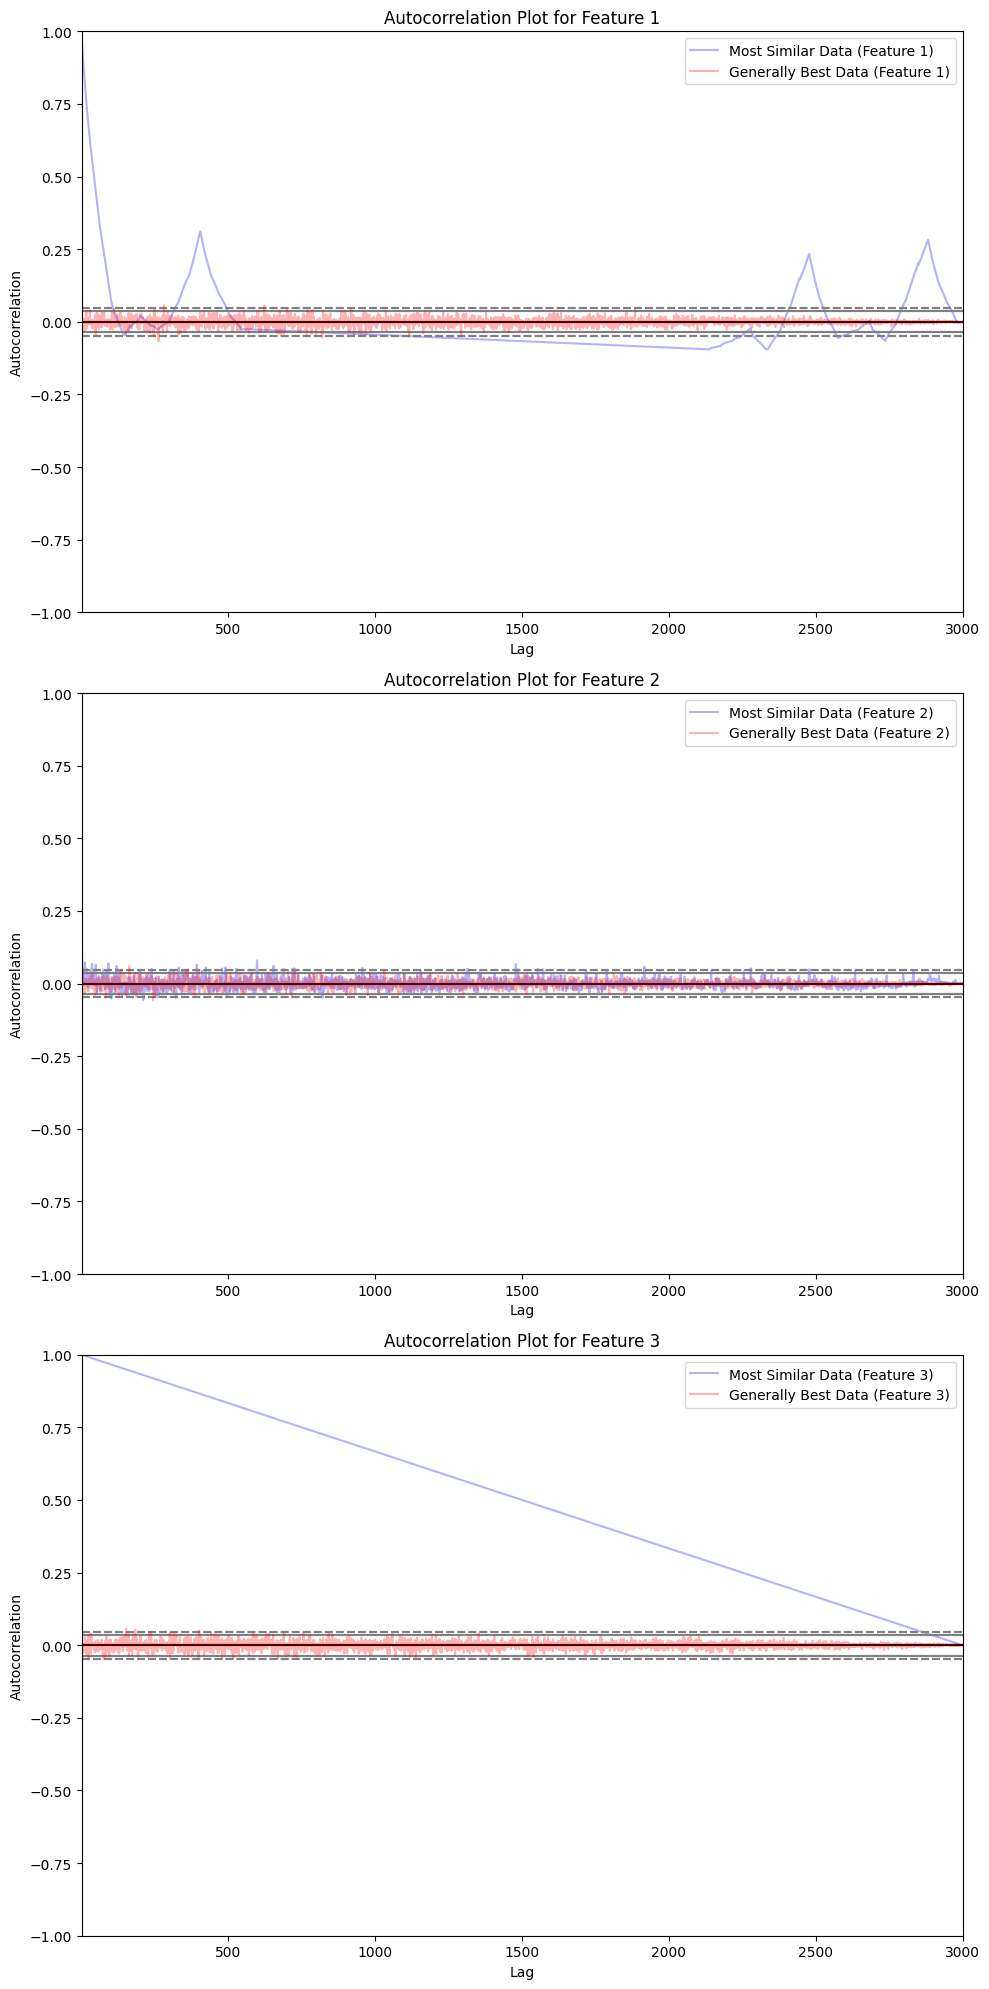

In [ ]:
#Plot autocorrelation

import pandas as pd

generally_best_index=372
most_similar_index=307

from pandas.plotting import autocorrelation_plot
# Extract the data for most_similar_index and generally_best_index
most_similar_data_selected = loaded_data[most_similar_index]
generally_best_data_selected = data[generally_best_index]

# Plot autocorrelation for each feature
plt.figure(figsize=(10, 20))
for feature_idx in range(3):  # Assuming there are 3 features
    plt.subplot(3, 1, feature_idx + 1)
    autocorrelation_plot(pd.Series(most_similar_data_selected[6000:9000, feature_idx]+ 1e-10), label=f'Most Similar Data (Feature {feature_idx + 1})', color='blue', alpha=0.3)
    autocorrelation_plot(pd.Series(generally_best_data_selected[6000:9000, feature_idx]+ 1e-10), label=f'Generally Best Data (Feature {feature_idx + 1})', color='red', alpha=0.3)
    #plt.legend([f'Most Similar Data (Feature {feature_idx + 1})', f'Generally Best Data (Feature {feature_idx + 1})'])
    plt.title(f'Autocorrelation Plot for Feature {feature_idx + 1}')
    plt.tight_layout()

plt.show()

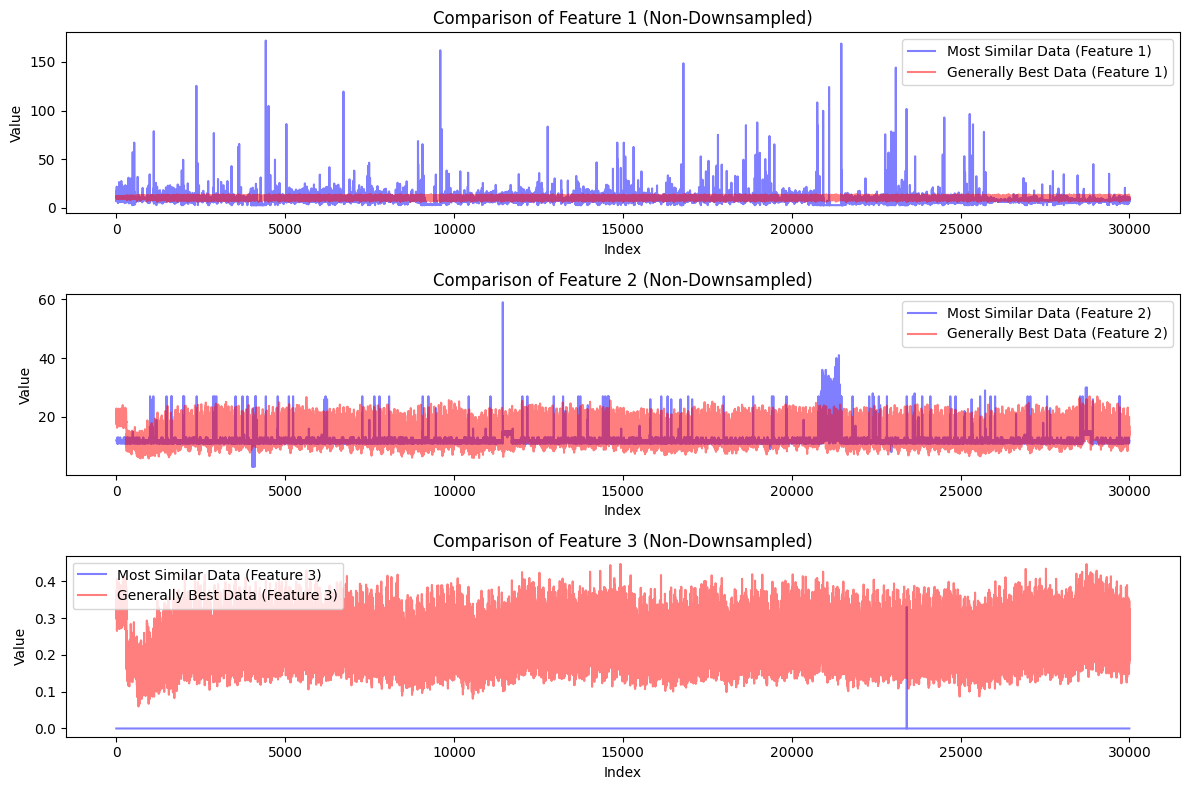

In [ ]:
# Visualize and compare two sequence

# Compare the two datasets directly by plotting their features without downsampling
plt.figure(figsize=(12, 8))

generally_best_index=372 #gener

most_similar_index=307    #ori


from pandas.plotting import autocorrelation_plot
# Extract the data for most_similar_index and generally_best_index
most_similar_data_selected = loaded_data[most_similar_index]
generally_best_data_selected = data[generally_best_index]


for feature_idx in range(3):  # Assuming there are 3 features
    plt.subplot(3, 1, feature_idx + 1)
    plt.plot(most_similar_data_selected[:, feature_idx], label=f'Most Similar Data (Feature {feature_idx + 1})', color='blue', alpha=0.5)
    plt.plot(generally_best_data_selected[:, feature_idx], label=f'Generally Best Data (Feature {feature_idx + 1})', color='red', alpha=0.5)
    plt.title(f'Comparison of Feature {feature_idx + 1} (Non-Downsampled)')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

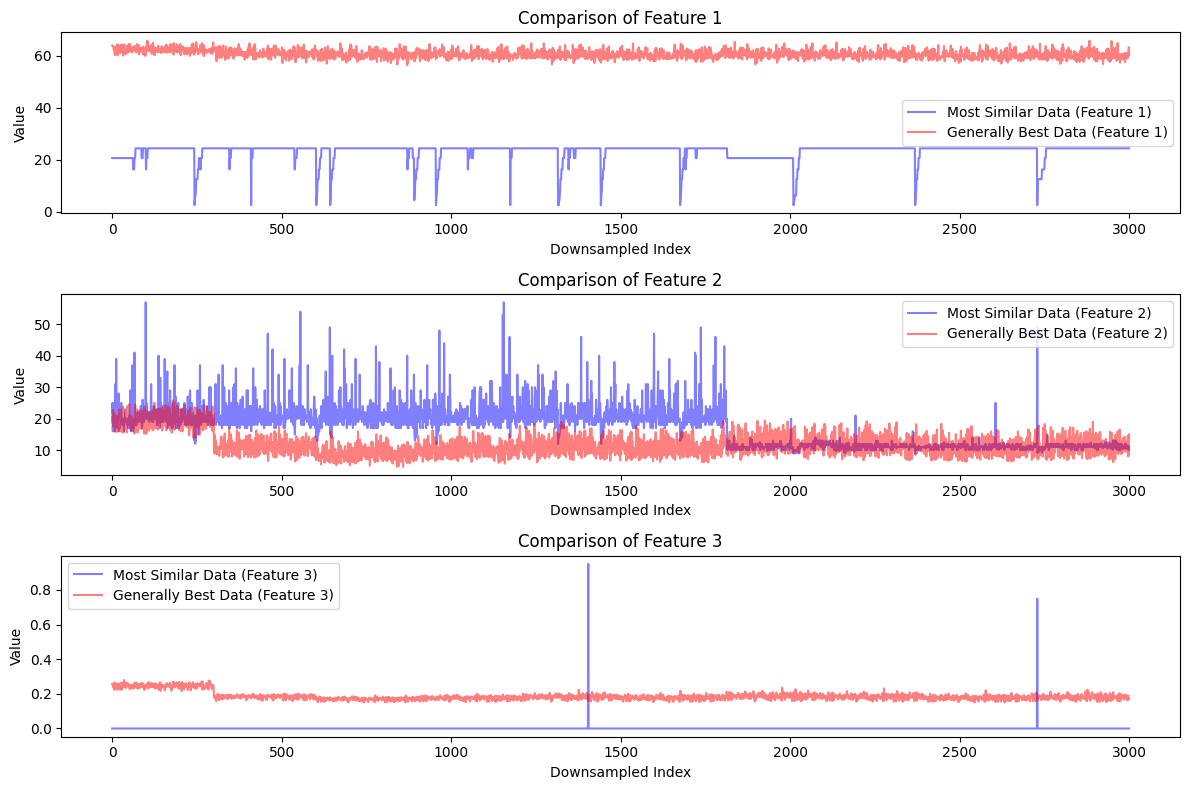

In [ ]:
# Downsample to have better visualization

most_similar_data_selected = loaded_data[most_similar_index]
generally_best_data_selected = data[generally_best_index]
# Compare the two datasets directly by plotting their features
plt.figure(figsize=(12, 8))
downsample_rate=10
# Downsample the data for better visualization
most_similar_data_downsampled = most_similar_data_selected[::downsample_rate, :]
generally_best_data_downsampled = generally_best_data_selected[::downsample_rate, :]

for feature_idx in range(3):  # Assuming there are 3 features
    plt.subplot(3, 1, feature_idx + 1)
    plt.plot(most_similar_data_downsampled[:, feature_idx], label=f'Most Similar Data (Feature {feature_idx + 1})', color='blue', alpha=0.5)
    plt.plot(generally_best_data_downsampled[:, feature_idx], label=f'Generally Best Data (Feature {feature_idx + 1})', color='red', alpha=0.5)
    plt.title(f'Comparison of Feature {feature_idx + 1}')
    plt.xlabel('Downsampled Index')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

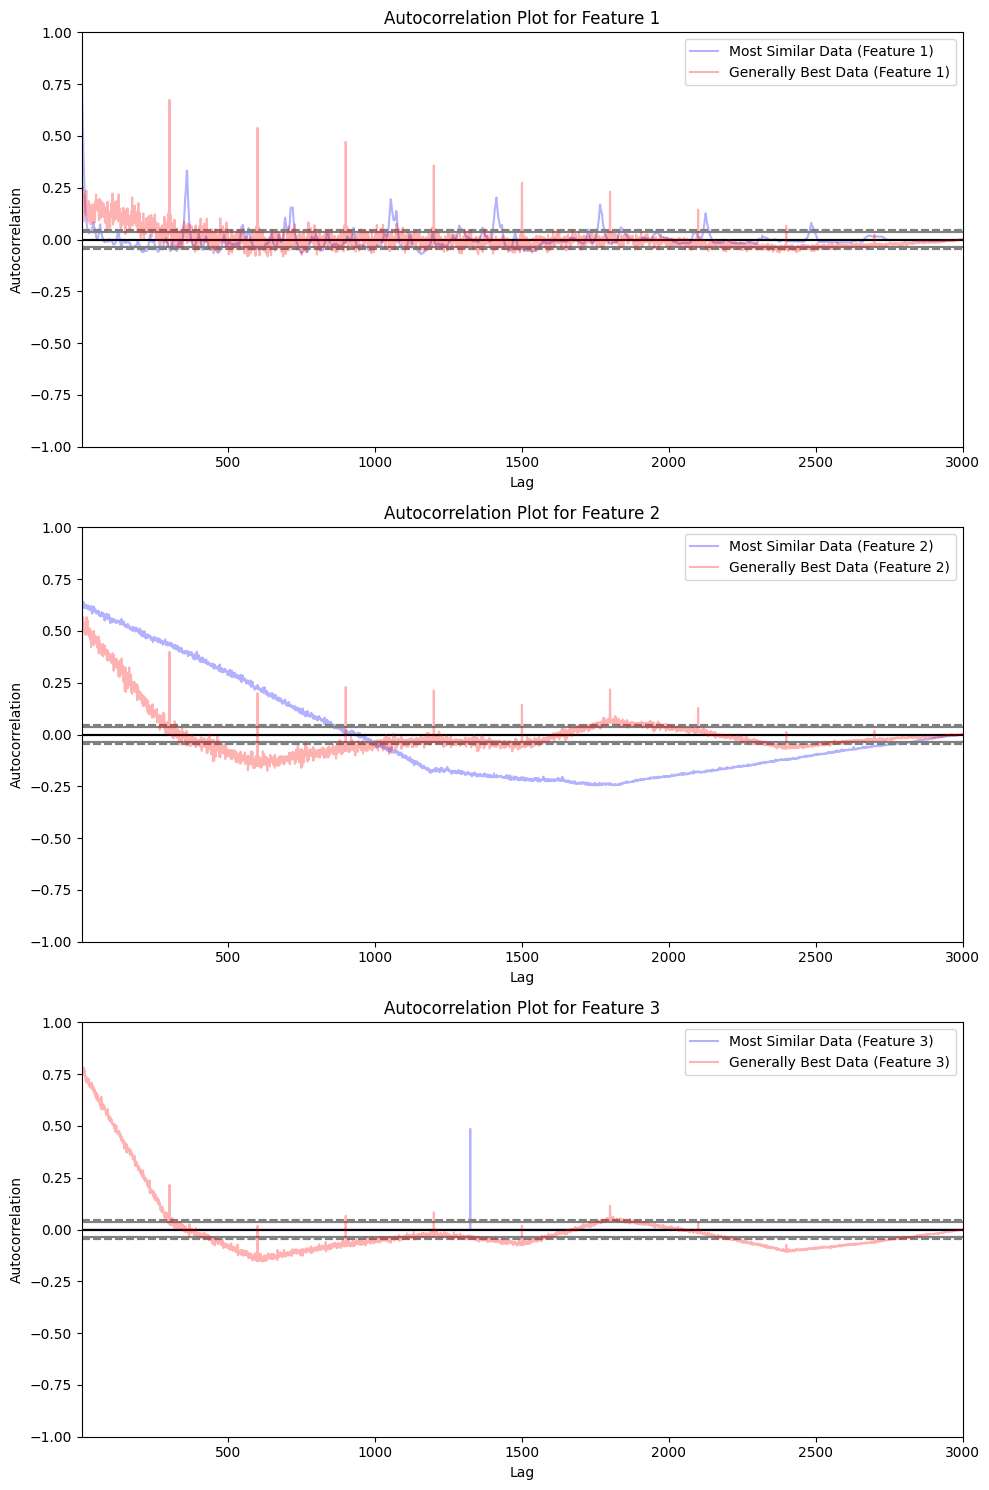

In [ ]:
#Plot autocorrelation

import pandas as pd

generally_best_index=372
most_similar_index=307

from pandas.plotting import autocorrelation_plot
# Extract the data for most_similar_index and generally_best_index
most_similar_data_selected = loaded_data[most_similar_index]
generally_best_data_selected = data[generally_best_index]

# Plot autocorrelation for each feature
plt.figure(figsize=(10, 15))
for feature_idx in range(3):  # Assuming there are 3 features
    plt.subplot(3, 1, feature_idx + 1)
    autocorrelation_plot(pd.Series(most_similar_data_downsampled[:, feature_idx]+ 1e-10), label=f'Most Similar Data (Feature {feature_idx + 1})', color='blue', alpha=0.3)
    autocorrelation_plot(pd.Series(generally_best_data_downsampled[:, feature_idx]+ 1e-10), label=f'Generally Best Data (Feature {feature_idx + 1})', color='red', alpha=0.3)
    #plt.legend([f'Most Similar Data (Feature {feature_idx + 1})', f'Generally Best Data (Feature {feature_idx + 1})'])
    plt.title(f'Autocorrelation Plot for Feature {feature_idx + 1}')
    plt.tight_layout()

plt.show()

In [ ]:
# The average %loss is quite high in the generated data, try to find a lower but make-sense data sequence

# Find the data with the top 10 lowest mean in feature 3
feature_3_means = [(x, np.mean(data[x, :, 2])) for x in range(data.shape[0])]

# Sort by the mean value of feature 3
feature_3_means.sort(key=lambda item: item[1])

# Get the indices of the top 10 data with the lowest mean in feature 3
top_10_lowest_mean_indices = [item[0] for item in feature_3_means[:100]]
top_10_lowest_mean_data = [data[idx] for idx in top_10_lowest_mean_indices]

print(f"Top 10 Data Indices with Lowest Mean in Feature 3: {top_10_lowest_mean_indices}")

Top 10 Data Indices with Lowest Mean in Feature 3: [1133, 1100, 874, 130, 508, 1180, 541, 312, 605, 661, 1268, 949, 1357, 225, 702, 11, 535, 1281, 780, 1098, 694, 1363, 1371, 986, 399, 1037, 810, 89, 1011, 5, 929, 1124, 1269, 306, 959, 362, 618, 1246, 183, 298, 466, 631, 1446, 1302, 247, 1137, 163, 748, 1345, 1130, 1249, 215, 515, 668, 1341, 651, 1375, 886, 1417, 1225, 1358, 1189, 960, 802, 1050, 733, 1440, 657, 633, 1148, 736, 1388, 855, 293, 504, 133, 169, 429, 403, 311, 652, 391, 586, 828, 1188, 543, 451, 1364, 468, 1151, 834, 333, 168, 1185, 1183, 420, 539, 1049, 545, 1372]
